<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/HOML_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
X_with_bias = np.c_[np.ones([len(X), 1]), X] # 편향 
y = iris["target"]


In [49]:
#12
train_ratio = 0.6
test_ratio = 0.2
validation_ratio = 0.2

total_size = len(X_with_bias)
test_size = int(test_ratio * total_size)
validation_size = int(validation_ratio * total_size)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)
X_train = X_with_bias[rnd_indices[:train_size]]
X_test = X_with_bias[rnd_indices[:test_size]]
X_validation = X_with_bias[rnd_indices[:validation_size]]

y_train = y[rnd_indices[:train_size]]
y_test = y[rnd_indices[:test_size]]
y_validation = y[rnd_indices[:validation_size]]

n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [50]:
#one-hot 벡터로 변경
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Y_train_one_hot = to_one_hot(y_train)
Y_validation_one_hot = to_one_hot(y_validation)
Y_test_one_hot = to_one_hot(y_test)

In [42]:
#activation function soft max 함수
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

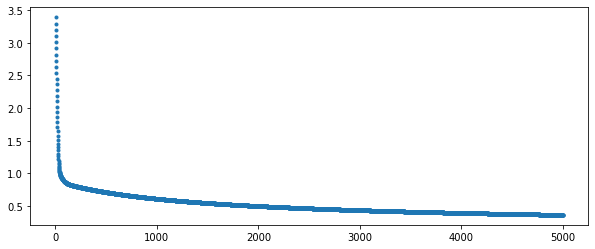

0.36415203852814015


In [65]:
#적정 파라미터 Theta 찾기

#학습률
eta = 0.01
#에폭수
n_iterations = 5001
#샘플수
m = len(X_train)
#log 0 방지
epsilon = 1e-7

#파라미터 초기화
Theta = np.random.randn(n_inputs, n_outputs)

loss = []
#반복
for iteration in range(n_iterations):
    #파라미터 곱 (m , n_outputs)
    logits = X_train.dot(Theta)
    #(m , n_outputs) 을 확률로 변환
    Y_proba = softmax(logits)
    
    #loss 출력
    loss.append(-np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1)))

    #에러평균 만큼 회귀
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

plt.figure(figsize=(10,4))
plt.plot(range(1,5002), loss, '.')
plt.show()
print(loss[-1])

In [53]:
print(Theta)

logits = X_validation.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_validation)
print(accuracy_score)

[[ 2.78276629 -0.97881505 -2.91558136]
 [ 0.31530396  1.22775929  1.09034809]
 [-2.46706701 -0.68769304  1.06310975]]
0.9333333333333333


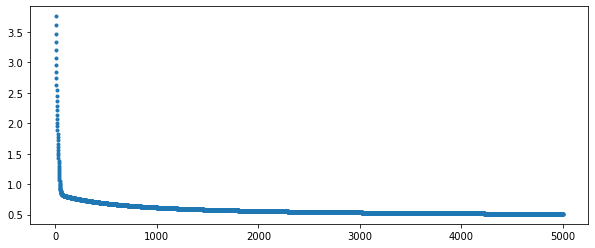

0.5122040938759655


In [66]:
#L2 규제

alpha = 0.1  # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

loss = []
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)

    #Loss
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss.append(xentropy_loss + alpha * l2_loss)

    #regress
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

plt.figure(figsize=(10,4))
plt.plot(range(1,5002), loss, '.')
plt.show()
print(loss[-1])

In [68]:
print(Theta)

logits = X_validation.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_validation)
print(accuracy_score)

[[ 4.05487731  0.54323867 -1.72897741]
 [-0.83195635  0.2609877   0.56992387]
 [-0.4251145  -0.09884904  0.52818057]]
0.9333333333333333


In [73]:
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_validation.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_validation_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break

0 2.438160053269063
500 1.2542406884114683
1000 0.8881244669691031
1500 0.7033514990616035
2000 0.607146778727961
2500 0.5528009788146178
3000 0.519721934966823
3500 0.4983476892621635
4000 0.48386109421259293
4500 0.4736545453731081
5000 0.4662309843698493


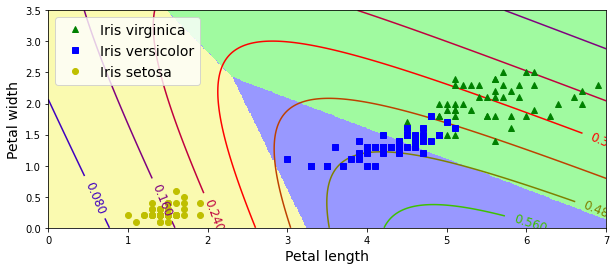

In [74]:
#그래프 표현!

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [75]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
print(accuracy_score)

0.9333333333333333
